# Human 3.6m
http://vision.imar.ro/human3.6m/description.php

In [ ]:
im = V[1, 0]
plt.imshow(im)

In [ ]:
V = human36m.load_videos('S11', 'Walking', 0)

In [ ]:
Actions = [
    'Discussion', 'Eating', 'Greeting',
    'Phoning', 'Photo', 'Posing', 'Purchases', 'Sitting',
    'Sitting', 'SittingDown', 'Smoking', 'Waiting', 'WalkDog',
    'Walking', 'WalkTogether'
]

for action in Actions:
    for actor in ['S9', 'S11']:
        for sa in [0, 1]:
            print('\n==========================')
            print('handle ', (actor, action, sa))
            print('---------------------------')
            V = human36m.load_videos(actor, action, sa)
            del V

len(Actions)

In [ ]:
# import cv2

# path = human36m.root + '/S1/Videos/_ALL.54138969.mp4'

# Im = []
# v = cv2.VideoCapture(path)
# while True:
#     ret, im = v.read()
#     Im.append(im)
#     print(ret)
#     if not ret:
#         break

This unreleased version of SpacePy is not supported by the SpacePy team.
(14544, 54)


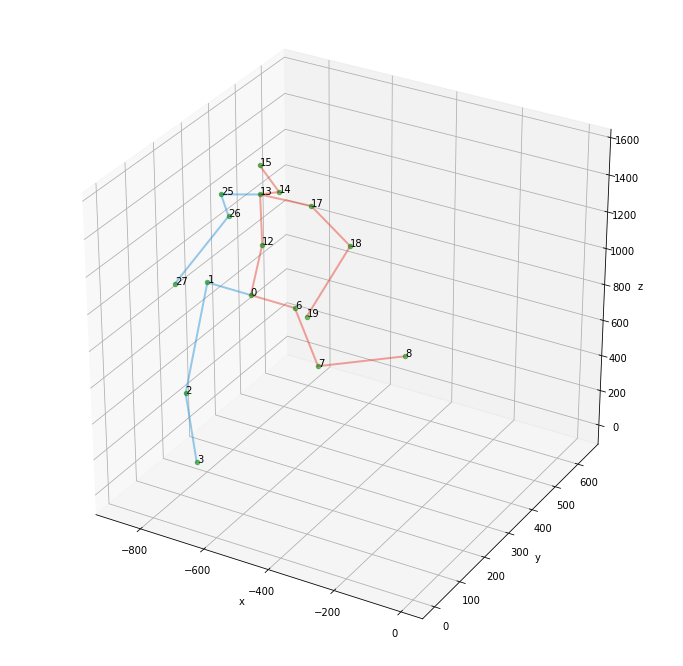

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import json; from pprint import pprint
Settings = json.load(open('settings.txt'))
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0,'../')
from os.path import isdir

root = Settings['h3.6m_root']

from pak.datasets.human36m import Human36m

human36m = Human36m(root)

person = 'S7'
action = 'Walking'
angles = human36m.get_raw_angles(person, action)

print(angles.shape)

video = human36m.get_3d(person, action)

human = video[1000]

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
#ax.set_aspect('equal')
# ax.set_xlim([-750, 750])
# ax.set_ylim([-1000, 500])
# ax.set_zlim([4800, 5800])

human36m.plot_human3d(ax, human)

plt.show()

In [ ]:
n, _, _ = video.shape

M = []
for f in range(n):
    pose = video[f]
    min_y = min(pose[:, 2])
    #min_y = pose[:, 2]
    M.append(min_y)
    
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.plot(range(n), M)
plt.show()

In [ ]:
n, _, _ = video.shape

L = []
R = []
for f in range(n):
    pose = video[f]
    L.append(pose[8,2])
    R.append(pose[3,2])
    
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.plot(range(n), L)
ax.plot(range(n), R)
plt.show()